# Shortest Hamiltonian path problem

Shortest Hamiltonian path problem is a little bit simpler version of the problem __Travelling Salesman Problem (TSP)__ 
where we are not looking for a __cycle__ passing through all the nodes (cities) and we are satisfied with the shortest __path__ connecting all cities. We don't have to go back to the start city.

There are N cities. Given is a distance matrix M=NxN, where $M[i][j]$ is a distance from the i-th to the j-th city.
In this exercise, we consider a symmetrical variant of shortest Hamiltonian path problem, i.e., $M[i][j] = M[j][i]$. Furhermore, $M[i][i] = 0$.
The objective is to find the __shortest path traversing through each city once__. In other words: <br> Let s=[3,1,...,5] be some N-element permutation of indices. We want to find such a permutation that $\sum_{k=2,...,N}M[s[k-1]][s[k]]$ is optimal (minimal).

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0.

# Part 1: Evolutionary algorithm

In [1]:
import common as cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1) Evaluation

Complete the below function. It should evaluate an input solution (decision vector, vector of indices) in terms of TSP distance criterion. M is a distance matrix. Return the computed total distance.

In [29]:
def getEvaluation(solution, M):
    distance = 0
    for i in range(1,len(solution)):
        distance += M[solution[i-1]][solution[i]]
    return distance

M = cm.getTutorialDistanceMatrix() ### 6 CITIES
print(getEvaluation([0,1,2,3,4,5], M)) 
print(getEvaluation([5,4,3,2,1,0], M))
print(getEvaluation([0,2,1,3,5,4], M))

174.32598574155733
174.32598574155733
328.20779166053677


### 1.2) Validation

This function can be used to validate the solution, i.e., to check if a given solution vector is of a proper size and to check if each element is unique.

In [30]:
def isValid(solution, cities):
    if len(solution) != cities: return False
    s = set(solution)
    e = set([i for i in range(cities)])
    if s==e: return True
    else: return False
    
print(isValid([0,1,2,3,4,5,6], 6)) # FALSE
print(isValid([0,1,2,3,4,5], 6)) # TRUE
print(isValid([0,1,2,3,4,5,5], 6)) # FALSE
print(isValid([0,1,1,2,3,2], 6)) # FALSE

False
True
False
False


### 1.3) Initialization

We need to create a population of solutions. These solutions - initially - can be generated randomly. 
Firstly, complete getRandomSolution function (cities = the number of cities considered in the TSP problem).
It should generate a random permutation of [0,1,...,cities] vector. You can use np.random.shuffle function. Then, 
finish getInitialPopulation method. It should return a populationSize-element vector of pairs [distance, solution], where a solution is a random permutation of indices, and distance = the total distance (solution evaluation). 

In [31]:
def getRandomSolution(cities):
    s = []
    for i in range(cities):
        s.append(i)
    np.random.shuffle(s)
    return s

def getInitialPopulation(populationSize, cities, M):
    population = []
    for i in range(populationSize):
        s = getRandomSolution(cities)
        ev = getEvaluation(s, M)
        population.append([ev,s])
    return population

def printPopulation(population):
    for s in population:
        print(str(s[0]) + " : " + str(s[1]))

population = getInitialPopulation(10, 6, M)
printPopulation(population)

229.73767860414478 : [5, 4, 0, 1, 3, 2]
306.9356042396468 : [4, 3, 1, 0, 5, 2]
312.6700134374188 : [1, 2, 5, 0, 3, 4]
246.1251700624085 : [5, 4, 2, 3, 0, 1]
324.3579359344976 : [1, 5, 2, 4, 3, 0]
301.482763986571 : [5, 1, 0, 3, 2, 4]
338.34211512590406 : [1, 0, 3, 5, 2, 4]
206.33239915121482 : [0, 5, 3, 2, 4, 1]
174.32598574155733 : [0, 1, 2, 3, 4, 5]
247.40649545983956 : [0, 4, 1, 3, 2, 5]


### 1.4) Sort population

The below function should sort the population according to the distance, i.e., according to the first element of each pair. These should be ordered from the smallest to the largest.You can use .sort method and a lambda function.

In [32]:
def sortPopulation(population):
    population.sort(key = lambda x:x[0])

sortPopulation(population)
printPopulation(population)

174.32598574155733 : [0, 1, 2, 3, 4, 5]
206.33239915121482 : [0, 5, 3, 2, 4, 1]
229.73767860414478 : [5, 4, 0, 1, 3, 2]
246.1251700624085 : [5, 4, 2, 3, 0, 1]
247.40649545983956 : [0, 4, 1, 3, 2, 5]
301.482763986571 : [5, 1, 0, 3, 2, 4]
306.9356042396468 : [4, 3, 1, 0, 5, 2]
312.6700134374188 : [1, 2, 5, 0, 3, 4]
324.3579359344976 : [1, 5, 2, 4, 3, 0]
338.34211512590406 : [1, 0, 3, 5, 2, 4]


### 1.5) Summarize the population

The below function should compute minimum, mean, and maximum value of the total distances of solutions in the population. Return these statistics as [min, mean, max] vector. 

In [36]:
def getStats(population):
    mini = min(sub[0] for sub in population)
    maxi = max(sub[0] for sub in population)
    mean = 0
    for i in range(len(population)):
        mean += getEvaluation(population[i][1],M)
    mean = mean/len(population)
    return [mini, mean, maxi]

print(getStats(population))

[174.32598574155733, 268.7716161743203, 338.34211512590406]


### 1.6) Tournament selection of size K

You are asked to implement a tournament for parent selection (it is assumed that the population is already sorted). Firstly, complete getTournamentSelection method. It should return index corresponding to selected parent solution. Simply generate random permutation of integers from [0,...,populationSize], take K first elements and select the smallest index (as the solutions are ordered from the best to the worst). Repeat this process twice and return a vector [index1, index2]. Then, complete getMatingPool method. Usually, matingPoolSize = population size, i.e., we wish to generate an offspring population of size populationSize and thus we need to select such many pairs of parent solutions. This metod should return a vector of these pairs, e.g., [[2, 5], [9, 2], ..., [5, 7]]. 

In [48]:
def getTournamentSelection(populationSize, size):
    parent = 0
    tournament = np.random.choice(populationSize, size)
    parent = min(tournament)
    return parent

def getParentIndices(populationSize, K):
    parents = []
    for i in range(2):
        parents.append(getTournamentSelection(populationSize, size=K))
    return parents
    
def getMatingPool(matingPoolSize, populationSize, K):
    matingPool = []
    for i in range(matingPoolSize):
        tmp = getParentIndices(populationSize, K)
        matingPool.append(tmp)
    return matingPool
     
matingPool = getMatingPool(10, 10, 2)
print(matingPool)

[[8, 4], [1, 2], [7, 2], [2, 7], [3, 0], [2, 2], [2, 7], [4, 5], [0, 8], [0, 3]]


How does the selection depend on K? Run the below code for different K and verify your thoughts. 

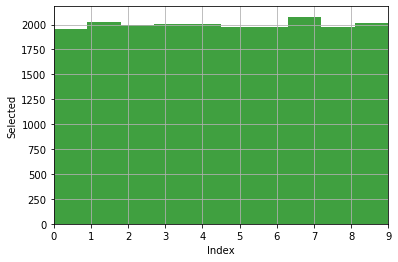

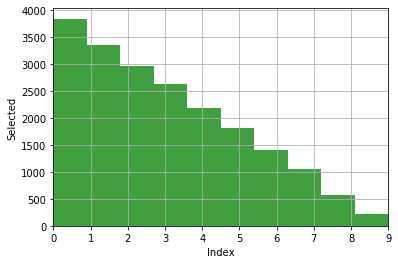

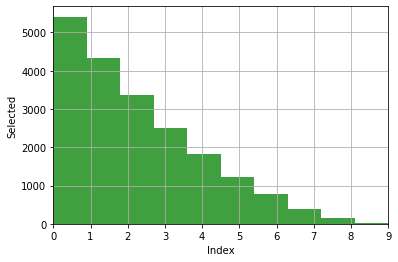

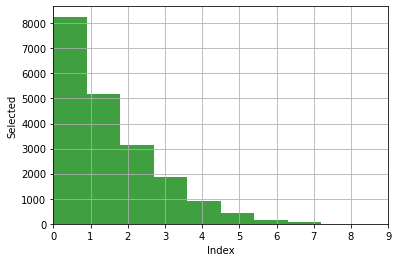

In [52]:
def testTournament(matingPoolSize, populationSize, K):
    testMatingPool = getMatingPool(matingPoolSize, populationSize, K)
    cm.displayHistogram(plt, np, testMatingPool, populationSize)
    
testTournament(10000, 10, 1)
testTournament(10000, 10, 2)
testTournament(10000, 10, 3)
testTournament(10000, 10, 5)

### 1.7) Crossover operator

Now, you are asked to implement the crossover operator. A and B are solutions (decision vectors). Let child be a new offspring solution (decision vector) and N is the number of cities.  Assume that the first N/2 elements of the child vector = the first N/2 elements of A, while the last N/2 elements of the child vector = the last N/2 elements of B. Obviously, such constructed solution may not be valid (use isValid) method. Repair this. You can, e.g., check (i) which indices are duplicated and (ii) which indices are missing. Then, you can replace one copy of each duplicate with one random missing index. 

In [ ]:
def getCrossedOver(A, B):
    child = A.copy()
    N = len(A)
    ### TODO simple crossover
    
    if isValid(child, N): return child
    ### TODO repair child
    
    if not isValid(child, N): print("CROSSOVER ERROR!")
    return child

### TEST
print(getCrossedOver([0,1,2,3,4,5],[0,1,3,4,2,4]))

### 1.8) Mutation operator

Implement the mutation operator. Simply swap two different random cities (indices). Apply this mutation with a certain probability (input argument).

In [ ]:
def mutate(solution, probability):
    if np.random.random() < probability:
        ### TODO
    
for i in range(10):
    s= [0,1,2,3,4,5]
    mutate(s, 0.9)
    print(s)

### 1.9) Create offspring

Now, combine both operators. The below method should generate the offspring. For each pair of parent indices in matingPool, i.e., [index1, index2], take the corresponding solutions from the population and apply the crossover and mutation operators in order to generate a single offspring/child. Evaluate this solution, i.e., compute the total distance. Finally, add [distance, child] to children vector.   

In [ ]:
def getOffspring(population, matingPool, mutationProbability, M):
    children = []
    ### TODO
    return children

### 1.10) Evolutionary Algorithm

Now, you are asked to combine all the previously completed methods into an evolutionary algorithm. This is the outline of the algorithm: <br>
1) Create an initial population of size "populationSize" <br>
2) Sort the population <br>
3) Construct a mating pool <br>
4) Generate an offspring of size "populationSize" <br>
5) Merge the current population and the offspring <br>
6) Sort such merged population <br>
7) Remove the worst half of the population or a better approach is to use tournament selection (run populationSize times) <br>
8) Go to (2) until the stopping criterion is not meet (repeat for the assumed number of generations) <br>

In each generation, compute & display the statistics concerning the current population. Finally, what is the best solution found by the method? Rerun the method for different parameters (e.g., population size) and check if you can improve the result.

In [ ]:
###
costMatrix = cm.getTutorialDistanceMatrix() ### 6 CITIES
cities = 6
mutationProbability = 1.0/6.0
populationSize = 20
generations = 50

population = getInitialPopulation(populationSize, cities, costMatrix)
sortPopulation(population)

for g in range(generations):
    ### TODO

# Part 2: Visualization of convergence

2.1) Now, change the data set (distance matrix) to cm.getLargeDistanceMatrix. This instance concerns 15 cities. Run the evolutionary algorithm with a population size of 20 and the number of generation of 200 (and suitably adjust the mutation probability - 1.0/15.0). In each generation, store the statistics (min, mean, and max distances found, in, respectively, Y_MIN, Y_MEAN, Y_MAX). Then, use cm.plotConvergence(plt, X, Y_MIN, Y_MEAN, Y_MAX) to display the convergence plot. Rerun the code for different parameters and observe the results. What is the best value (distance) you could find (print)?

In [ ]:
### TODO
    

cm.plotConvergence(plt, X, Y_MIN, Y_MEAN, Y_MAX)
print(Y_MIN[-1])

2.2) Each time you rerun the code, while keeping the paramet values fixed, the results my slightly change. This is due to the random nature of evolutionary algorithms. Hence, in order to get the reliable results, the method must be run several times and the results have to be averaged. Do the following:<br>
- run the method 20 times <br>
- in each run: capture the best result found  throughout evolutionary search (i.e., in each generation) <br>
- for each generation: find min, mean, and max value over 20 independent runs <br>
- use cm.plotConvergence to display the convergence
- print the best value ever found 

In [ ]:
### TODO

cm.plotConvergence(plt, X, Y_MIN, Y_MEAN, Y_MAX)
print(Y_MIN[-1])

# Part 3: Impact of different parameter values on the optimization

In this exercise, you are asked to check how the method performs when involving different parameter values. Firtly, we wish to plot several convergence plots in a single chart. For this reason, you may copy & paste the cm.plotConvergence function (from common.py) and modify it. Then, copy & paste the code you completed in the previous exercise (the one which averages 20 trial runs). Then: <br>
- Firsty, evaluate the performance in terms of different population sizes. Specifically, check how the method performs for the population size = 5, 10, 20, and 50. Display 4 convergence plots in a signle chart. 
- Secondly, evaluate the performance in terms of different tournament sizes. Specifically, check how the method performs for the tournament size = 1, 2, 5, and 15. Display 4 convergence plots in a signle chart. 

In [ ]:
def plotConvergence2(plt, X, Y_MINs, Y_MEANs, Y_MAXs):
    ### TODO

In [ ]:
### TODO (POPULATION SIZE)


In [ ]:
### TODO (TOURNAMENT SIZE)
